In [47]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions
library(lubridate)
library('treemap')
library('plyr')
library('dplyr')
library('corrplot')
library('wordcloud')
library('ggplot2')


## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

#list.files(path = "kaggle/input/TEDTalks/ted_main.csv")
list.files(path = "../input/ted-talks")
df=read.csv("../input/ted-talks/ted_main.csv", header=TRUE, sep=',')

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

[1] "ted_main.csv"    "transcripts.csv"

In [48]:
head(df,2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity,47227110
2,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', '

In [49]:
dim(df)

[1] 2550   17

In [50]:
str(df)

'data.frame':	2550 obs. of  17 variables:
 $ comments          : int  4553 265 124 200 593 672 919 46 852 900 ...
 $ description       : Factor w/ 2550 levels "'I am a mathematician, and I would like to stand on your roof.' That is how Ron Eglash greeted many African fam"| __truncated__,..: 1835 2492 1510 1035 2537 2115 2412 198 1629 1600 ...
 $ duration          : int  1164 977 1286 1116 1190 1305 992 1198 1485 1262 ...
 $ event             : Factor w/ 355 levels "AORN Congress",..: 80 80 80 80 80 80 80 80 80 80 ...
 $ film_date         : int  1140825600 1140825600 1140739200 1140912000 1140566400 1138838400 1140739200 1140652800 1138838400 1140825600 ...
 $ languages         : int  60 43 26 35 48 36 31 19 32 31 ...
 $ main_speaker      : Factor w/ 2156 levels " OK Go"," Rodrigo y Gabriela",..: 1132 38 512 1259 773 2062 1075 1061 433 1693 ...
 $ name              : Factor w/ 2550 levels "Aakash Odedra: A dance in a hurricane of paper, wind and light",..: 1337 41 607 1485 918 2442 1270

In [51]:
#let's change the date from unix date stamp to actual date
df$film_date<-as_datetime(df$film_date, tz='UTC')
df$published_date<-as_datetime(df$published_date, tz='UTC')
head(df,2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
,<int>,<fct>,<int>,<fct>,<dttm>,<int>,<fct>,<fct>,<int>,<dttm>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity,47227110
2,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'na

In [52]:
# let's find the summary statistics for only numeric columns
nCol<-c('comments','duration','languages', 'num_speaker','views')
df3<-df[nCol]
#View(df3)
summary(df3)

    comments         duration        languages      num_speaker   
 Min.   :   2.0   Min.   : 135.0   Min.   : 0.00   Min.   :1.000  
 1st Qu.:  63.0   1st Qu.: 577.0   1st Qu.:23.00   1st Qu.:1.000  
 Median : 118.0   Median : 848.0   Median :28.00   Median :1.000  
 Mean   : 191.6   Mean   : 826.5   Mean   :27.33   Mean   :1.028  
 3rd Qu.: 221.8   3rd Qu.:1046.8   3rd Qu.:33.00   3rd Qu.:1.000  
 Max.   :6404.0   Max.   :5256.0   Max.   :72.00   Max.   :5.000  
     views         
 Min.   :   50443  
 1st Qu.:  755793  
 Median : 1124524  
 Mean   : 1698297  
 3rd Qu.: 1700760  
 Max.   :47227110  

In [ ]:
#now let's find the pearson correlation of these numeric columns
cor(df3)

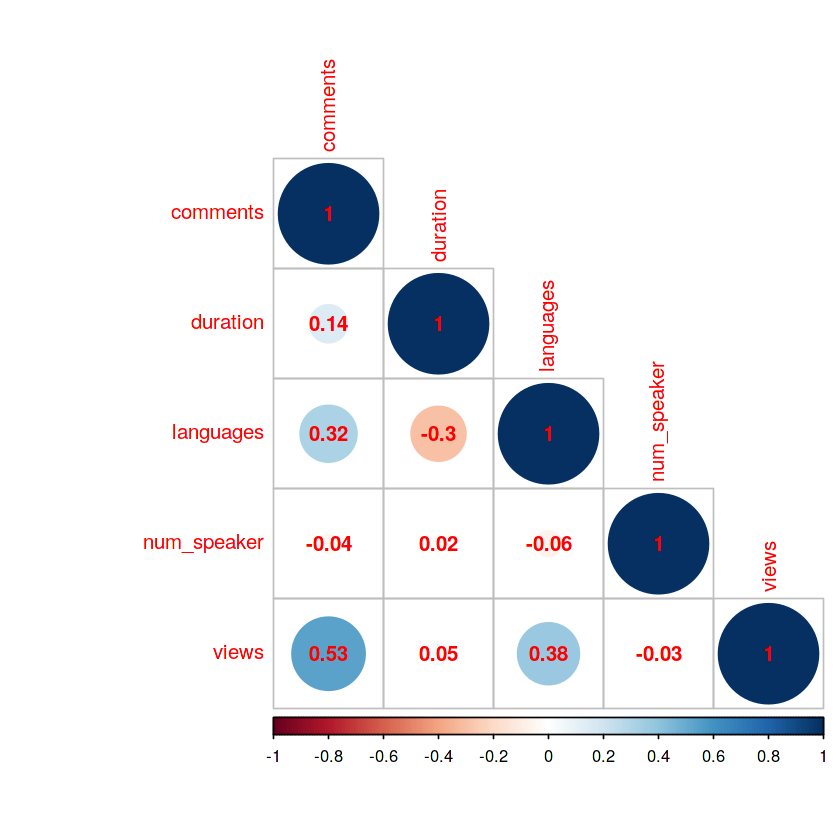

In [53]:
# now let's see the correlation plot of this numeric columns
# In purticular, let's determine the correlation between views and languages
# or does having more views mean that they are translated into more languages
corrplot(cor(df3), method='circle', type = 'lower', addCoef.col='red')

[1] 10  4

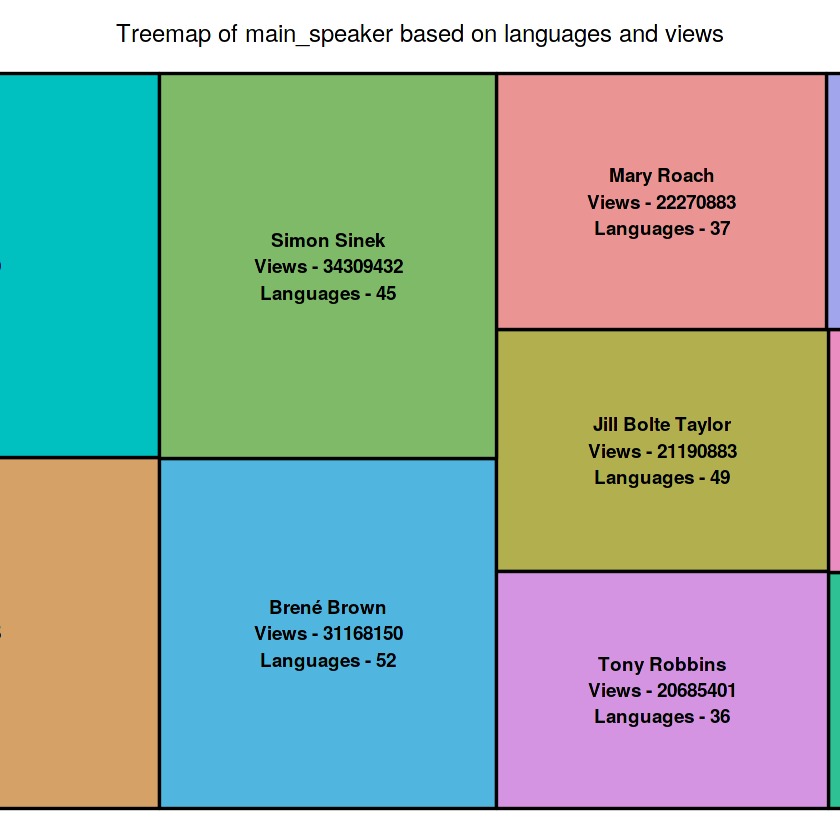

In [54]:
# let's chart a treechart of main_speaker, languages, and views togather
df2<-df%>%select('main_speaker','languages','views')%>%group_by('main_speaker')%>%arrange(desc(views))%>%head(10)
#View(df2)
dim(df2)

field<-c('main_speaker','views')
df2$fieldChange <- do.call('paste',c(df2[field], sep="\nViews - "))
field<-c('fieldChange','languages')
df2$fieldChange<-do.call('paste',c(df2[field],sep="\nLanguages - "))
#View(df2)

#?treemap
treemap(df2, index ='fieldChange', vSize='views', 
        title = 'Treemap of main_speaker based on languages and views')

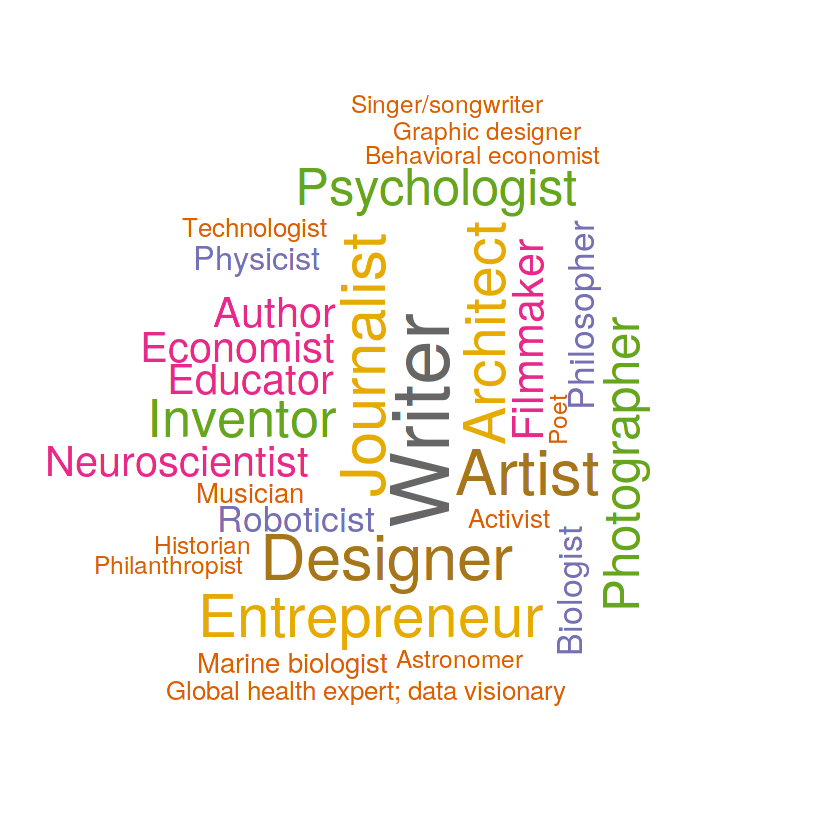

In [55]:
# Word Cloud Display for Speaker Occupation
# let's display top occupation employing word cloud
temp<-table(df$speaker_occupation)
temp<-as.data.frame(temp)
temp<-temp[with(temp, order(-Freq)),]
#View(temp)

set.seed(1234)
wordcloud(words = temp$Var1, freq = temp$Freq, min.freq = 1,
          max.words=30, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

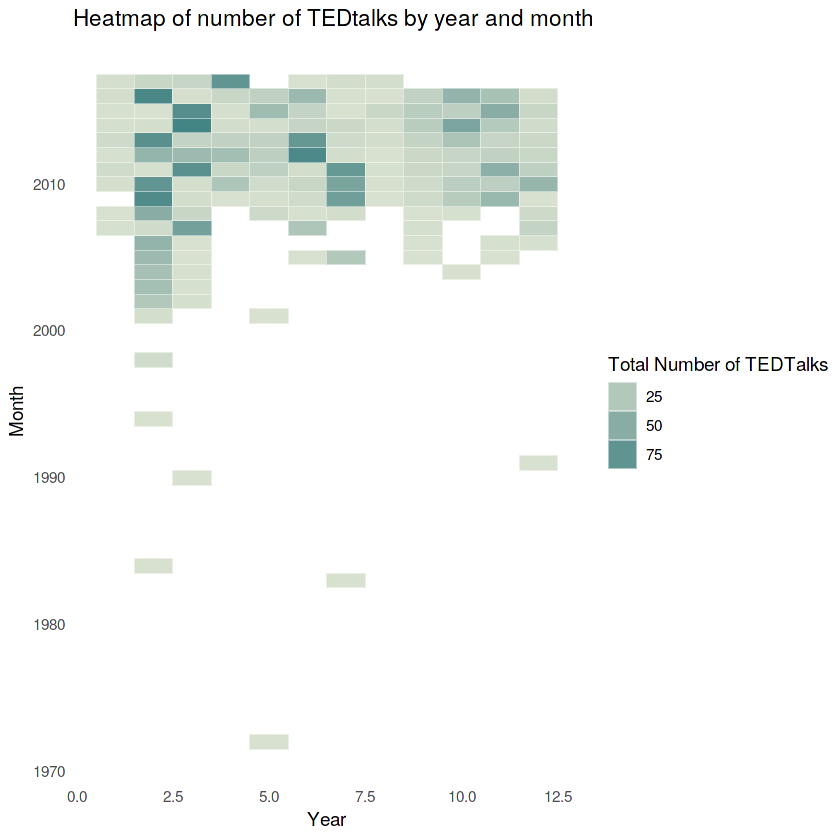

In [56]:
# Display Heatmap of num of tedtalk for each year and each month
# let's display number of talk for each year as heatmap
df4<-aggregate(df$num_speaker, by=list(df$film_date), sum)
colnames(df4)<-c('Date', 'num_talk')
#View(df4)
df4['year']<-year(df4$Date)
df4['month']<-month(df4$Date)
df4['day']<-day(df4$Date)
df5<-aggregate(df4$num_talk, by=list(df4$month, df4$year), sum)
colnames(df5)<-c('month', 'year', 'num_talk')
#View(df5)

#Assign color variables
col1 = "#d8e1cf" 
col2 = "#438484"
ggplot(df5, aes(month, year)) + geom_tile(aes(fill = num_talk),colour = "white", na.rm = TRUE) +
  scale_fill_gradient(low = col1, high = col2) +  
  guides(fill=guide_legend(title="Total Number of TEDTalks")) +
  theme_bw() + theme_minimal() + 
  labs(title = "Heatmap of number of TEDtalks by year and month",
       x = "Year", y = "Month") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

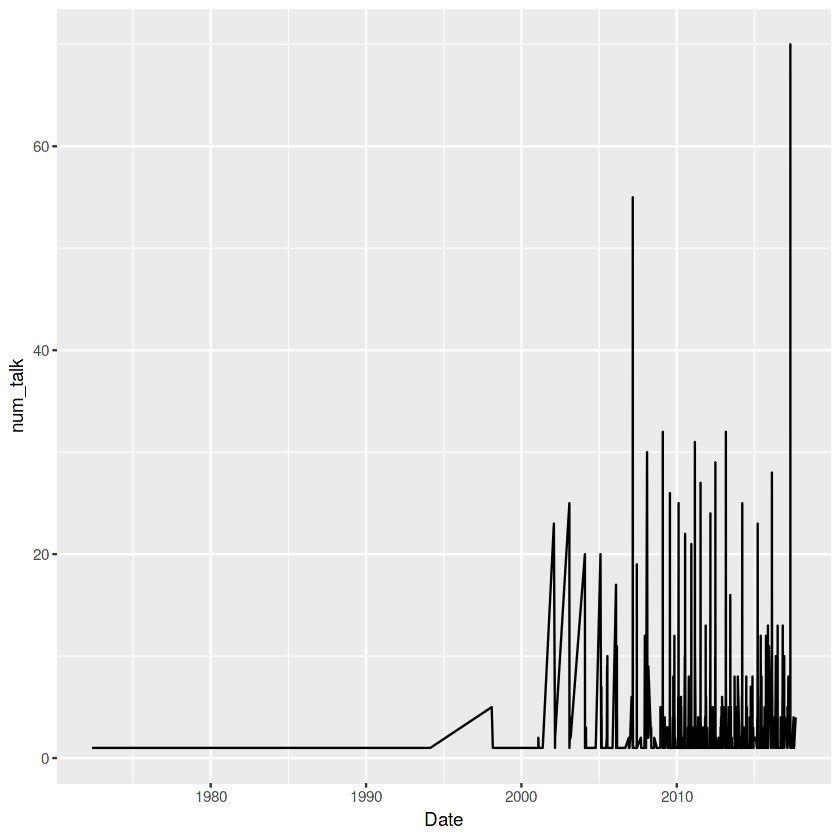

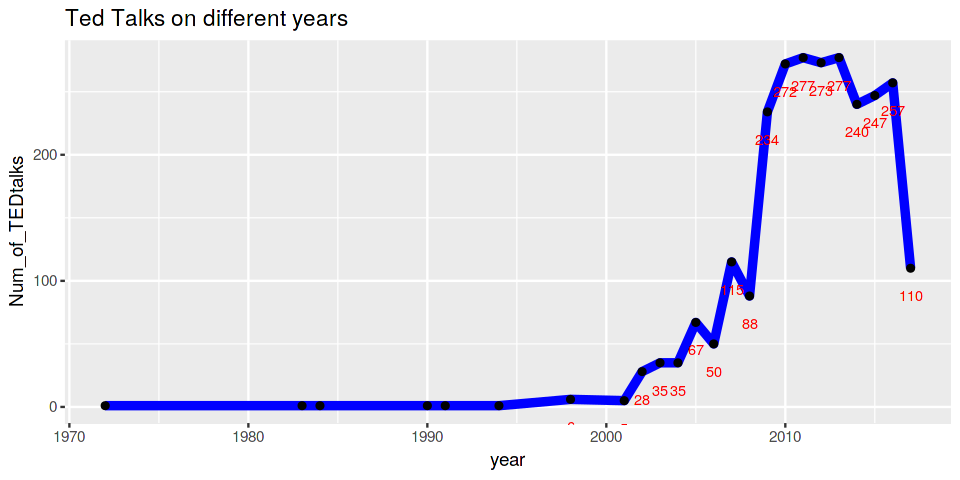

In [57]:
# let see the same information in heatmap using simple line chart
# draw line chart
ggplot( data = df4, aes( Date, num_talk)) + geom_line()
# let's see the same informatio for year
df6<-aggregate(df4[,2], by=list(df4$year), FUN=sum)
colnames(df6)<-c('year','Num_of_TEDtalks')
#View(df6)
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(data=df6, aes(year, Num_of_TEDtalks))+
  geom_line(color='blue', size=2)+
  geom_point()+
  geom_text(aes(label=Num_of_TEDtalks), vjust=3, color='red', size=3)+
  ggtitle("Ted Talks on different years")

In [58]:
# let's find the top tag
tags<-df$tags
tags<-as.character(tags)
#View(tags)

ERROR: Error in View(tags): ‘View()’ not yet supported in the Jupyter R kernel
